In [2]:
import os
import xarray as xr
import rioxarray as rio
import numpy as np
import rasterio
from rioxarray.merge import merge_datasets
import numpy.ma as ma
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import netCDF4
import glob
import pandas as pd
from pyproj import CRS

In [3]:
data_dir = r"/home/raraki/waves/projects/smap-drydown/data/"
short_name = r"MOD44B.061"
datarods_dir = "datarods"
coord_file = "coord_info.csv"
SMAPL3_dir = "SPL3SMP"
output_dir = os.path.join(data_dir, short_name, "coarsen_9km")


In [4]:

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [5]:
# Pattern to match directories only
start_year = 2015
end_year = 2023
for year in range(start_year, end_year + 1):
    pattern=f"MOD44B.A{year}*.hdf"
    # pattern="*.hdf"
    fn_pattern = os.path.join(data_dir, short_name, pattern)
    print(fn_pattern)
    filenames = glob.glob(fn_pattern)
    print(filenames)

/home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2015*.hdf
[]
/home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2016*.hdf
[]
/home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2017*.hdf
[]
/home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2018*.hdf
[]
/home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2019*.hdf
[]
/home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2020*.hdf
[]
/home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2021*.hdf
[]
/home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2022*.hdf
[]
/home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2023*.hdf
[]


In [6]:
year=2001
pattern=f"MOD44B.A{year}*.hdf"
# pattern="*.hdf"
fn_pattern = os.path.join(data_dir, short_name, pattern)
print(fn_pattern)
filenames = glob.glob(fn_pattern)
print(filenames)
print(len(filenames))

/home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001*.hdf
['/home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h31v10.061.2022273220744.hdf', '/home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h20v06.061.2022273204023.hdf', '/home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h11v02.061.2022273192452.hdf', '/home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h23v11.061.2022273211549.hdf', '/home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h06v03.061.2022273191125.hdf', '/home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h33v09.061.2022273221643.hdf', '/home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h22v08.061.2022273211311.hdf', '/home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h28v04.061.2022273214851.hdf', '/home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h31v12.061

In [7]:
# Define the PROJ.4 string
proj_string = "+proj=sinu +R=6371007.181 +nadgrids=@null +wktext"
crs = CRS(proj_string)
wkt = crs.to_wkt()

# Deine vegetation variales 
veg_variables = ['Percent_Tree_Cover', 'Percent_NonTree_Vegetation', 'Percent_NonVegetated']

In [8]:
# ds = xr.open_dataset(os.path.join(output_dir, filenames[0]), engine='netcdf4')
coarsen_factor = 36 #144 (36km resolution) #36 (9km resolution)
ds_list = []
for i, filename in enumerate(filenames[:10]):
    print(f"Currently processing ({i}/{len(filenames)}): {filename}")
    _ds = rio.open_rasterio(os.path.join(data_dir, short_name, filename), masked=True)
    proj4_string = "+proj=sinu +R=6371007.181 +nadgrids=@null +wktext"
    _ds.rio.write_crs(proj4_string, inplace=True)
    ds = _ds.rio.reproject("EPSG:4326")
    # Assuming ds_wgs84 is your xarray Dataset
    for var in veg_variables:
        ds[var] = ds[var].where((~ds[var].isnull()) & (ds[var] != 200), np.nan)
    # Apply coarsening on specified dimensions (e.g., spatial dimensions)
    ds_9km = ds.coarsen(x=coarsen_factor, y=coarsen_factor, boundary='trim').mean()
    ds_list.append(ds_9km)

Currently processing /home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h31v10.061.2022273220744.hdf
Currently processing /home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h20v06.061.2022273204023.hdf
Currently processing /home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h11v02.061.2022273192452.hdf
Currently processing /home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h23v11.061.2022273211549.hdf
Currently processing /home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h06v03.061.2022273191125.hdf
Currently processing /home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h33v09.061.2022273221643.hdf
Currently processing /home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h22v08.061.2022273211311.hdf
Currently processing /home/raraki/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h28v04.061.2022273214851.hdf
Currently proces

In [9]:
ds_merged = merge_datasets(ds_list, nodata=np.nan)
ds_merged.rio.write_crs(proj4_string, inplace=True)
ds_merged

/home/raraki/miniconda3/envs/SMAP/lib/python3.12/site-packages/rioxarray/raster_writer.py:130: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(
/home/raraki/miniconda3/envs/SMAP/lib/python3.12/site-packages/rioxarray/raster_writer.py:130: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(
/home/raraki/miniconda3/envs/SMAP/lib/python3.12/site-packages/rioxarray/raster_writer.py:130: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(
/home/raraki/miniconda3/envs/SMAP/lib/python3.12/site-packages/rioxarray/raster_writer.py:130: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.wa

<xarray.Dataset> Size: 118MB
Dimensions:                     (band: 1, x: 3430, y: 1225)
Coordinates:
  * band                        (band) int64 8B 1
  * x                           (x) float64 27kB -179.2 -179.1 ... 179.0 179.1
  * y                           (y) float64 10kB 69.24 69.13 ... -58.57 -58.67
    spatial_ref                 int64 8B 0
Data variables:
    Percent_Tree_Cover          (band, y, x) float32 17MB 0.2152 0.2152 ... nan
    Percent_NonTree_Vegetation  (band, y, x) float32 17MB 0.0 0.0 ... nan nan
    Percent_NonVegetated        (band, y, x) float32 17MB 99.78 99.78 ... nan
    Quality                     (band, y, x) float32 17MB 173.6 173.6 ... nan
    Percent_Tree_Cover_SD       (band, y, x) float32 17MB 329.0 329.0 ... nan
    Percent_NonVegetated_SD     (band, y, x) float32 17MB 839.5 839.5 ... nan
    Cloud                       (band, y, x) float32 17MB 173.3 173.3 ... nan
Attributes: (12/49)
    ASSOCIATEDINSTRUMENTSHORTNAME.1:      MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:        Terra
    ASSOCIATEDSENSORSHORTNAME.1:          MODIS
    AUTOMATICQUALITYFLAG.1:               Passed
    AUTOMATICQUALITYFLAGEXPLANATION.1:    set Passed as default, will decide ...
    DAYNIGHTFLAG:                         Day
    ...                                   ...
    SHORTNAME:                            MOD44B
    SOUTHBOUNDINGCOORDINATE:              -19.9999999982039
    TileID:                               51031010
    VERSIONID:                            61
    VERTICALTILENUMBER:                   10
    WESTBOUNDINGCOORDINATE:               132.005459532928

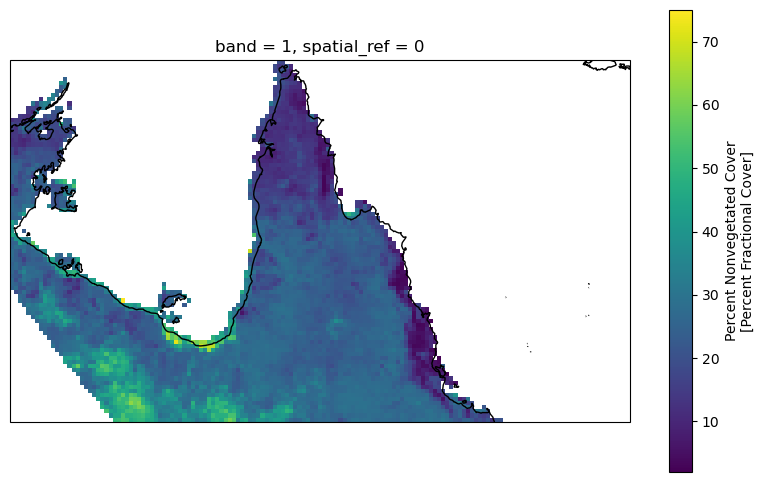

In [16]:
# https://corteva.github.io/rioxarray/html/examples/merge.html

# Create a plot
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())  # Set the projection to Plate Carree (longitude/latitude)
ax.coastlines()  # Add coastlines
ds_merged.rio.write_crs("epsg:4326", inplace=True)
# Assume the data variable to plot is named 'temperature'; adjust as per your dataset specifics
ds_merged_sub['Percent_NonVegetated'].sel(band=1).plot(
    ax=ax, 
    transform=ccrs.PlateCarree(),  # Specifies the data's projection
    x='x', y='y',  # Adjust according to your data dimensions
    cmap='viridis'  # Color map
)

# ax.set_title('Temperature Data Visualization')
plt.show()

In [81]:
ds_merged.to_netcdf(os.path.join(output_dir, f"data_{year}.nc"))

# Resample using coord_info

In [11]:
coord_info = pd.read_csv(os.path.join(data_dir, datarods_dir, coord_file), index_col="id")
unique_lon = np.sort(coord_info.longitude.unique())
unique_lat = np.sort(coord_info.latitude.unique())

# Clip unique_lon to the bounds of ds_merged.x
clipped_lon = np.clip(unique_lon, np.min(ds_merged['x'].values), np.max(ds_merged['x'].values))
clipped_lat = np.clip(unique_lat, np.min(ds_merged['y'].values), np.max(ds_merged['y'].values))

clipped_lon = clipped_lon[clipped_lon != 0]
clipped_lat = clipped_lat[clipped_lat != 0]

lon_interval = np.nanmean(np.diff(clipped_lon))
lat_interval = np.nanmean(np.diff(clipped_lat))
print(lon_interval, lat_interval)

0.3721103206467946 0.3158325684486534


In [13]:
ds_merged

<xarray.Dataset> Size: 118MB
Dimensions:                     (band: 1, x: 3430, y: 1225)
Coordinates:
  * band                        (band) int64 8B 1
  * x                           (x) float64 27kB -179.2 -179.1 ... 179.0 179.1
  * y                           (y) float64 10kB 69.24 69.13 ... -58.57 -58.67
    spatial_ref                 int64 8B 0
Data variables:
    Percent_Tree_Cover          (band, y, x) float32 17MB 0.2152 0.2152 ... nan
    Percent_NonTree_Vegetation  (band, y, x) float32 17MB 0.0 0.0 ... nan nan
    Percent_NonVegetated        (band, y, x) float32 17MB 99.78 99.78 ... nan
    Quality                     (band, y, x) float32 17MB 173.6 173.6 ... nan
    Percent_Tree_Cover_SD       (band, y, x) float32 17MB 329.0 329.0 ... nan
    Percent_NonVegetated_SD     (band, y, x) float32 17MB 839.5 839.5 ... nan
    Cloud                       (band, y, x) float32 17MB 173.3 173.3 ... nan
Attributes: (12/49)
    ASSOCIATEDINSTRUMENTSHORTNAME.1:      MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:        Terra
    ASSOCIATEDSENSORSHORTNAME.1:          MODIS
    AUTOMATICQUALITYFLAG.1:               Passed
    AUTOMATICQUALITYFLAGEXPLANATION.1:    set Passed as default, will decide ...
    DAYNIGHTFLAG:                         Day
    ...                                   ...
    SHORTNAME:                            MOD44B
    SOUTHBOUNDINGCOORDINATE:              -19.9999999982039
    TileID:                               51031010
    VERSIONID:                            61
    VERTICALTILENUMBER:                   10
    WESTBOUNDINGCOORDINATE:               132.005459532928

In [15]:
ds_merged_sub = ds_merged.rio.clip_box(
            minx=135.315650,
            miny=-19.642588,
            maxx=150.957435,
            maxy=-10.487812,
        )
ds_merged_sub

<xarray.Dataset> Size: 374kB
Dimensions:                     (band: 1, x: 151, y: 88)
Coordinates:
  * band                        (band) int64 8B 1
  * x                           (x) float64 1kB 135.3 135.4 ... 150.9 151.0
  * y                           (y) float64 704B -10.5 -10.6 ... -19.49 -19.59
    spatial_ref                 int64 8B 0
Data variables:
    Percent_Tree_Cover          (band, y, x) float32 53kB nan nan ... nan nan
    Percent_NonTree_Vegetation  (band, y, x) float32 53kB nan nan ... nan nan
    Percent_NonVegetated        (band, y, x) float32 53kB nan nan ... nan nan
    Quality                     (band, y, x) float32 53kB nan nan ... nan nan
    Percent_Tree_Cover_SD       (band, y, x) float32 53kB nan nan ... nan nan
    Percent_NonVegetated_SD     (band, y, x) float32 53kB nan nan ... nan nan
    Cloud                       (band, y, x) float32 53kB nan nan ... nan nan
Attributes: (12/49)
    ASSOCIATEDINSTRUMENTSHORTNAME.1:      MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:        Terra
    ASSOCIATEDSENSORSHORTNAME.1:          MODIS
    AUTOMATICQUALITYFLAG.1:               Passed
    AUTOMATICQUALITYFLAGEXPLANATION.1:    set Passed as default, will decide ...
    DAYNIGHTFLAG:                         Day
    ...                                   ...
    SHORTNAME:                            MOD44B
    SOUTHBOUNDINGCOORDINATE:              -19.9999999982039
    TileID:                               51031010
    VERSIONID:                            61
    VERTICALTILENUMBER:                   10
    WESTBOUNDINGCOORDINATE:               132.005459532928

In [17]:
# Function to sample the nearest data point for a given variable, latitude, and longitude
def get_nearest_value(row, ds, variable):
    try:
        # Adjust 'x' and 'y' to match the coordinate labels of your dataset, commonly 'lat' and 'lon'

        diff = np.abs(unique_lat - row['latitude'])
        closest_idx = np.argsort(diff)[:2]
        closestc_lat = unique_lat[closest_idx]
        lat_interval = np.abs(np.diff(closestc_lat))/2


        diff = np.abs(unique_lon - row['longitude'])
        closest_idx = np.argsort(diff)[:2]
        closestc_lon = unique_lon[closest_idx]
        lon_interval = np.abs(np.diff(closestc_lon))/2

        clipped_data = ds[variable].rio.clip_box(
            minx=row["longitude"]-lon_interval,
            miny=row['latitude']-lat_interval,
            maxx=row["longitude"]+lon_interval,
            maxy=row['latitude']+lat_interval,
        )
        
        avg_in_clip = np.nanmean(clipped_data.item())

        print(lat_interval, lon_interval)
        
        return avg_in_clip  # using .item() to get pure Python datatype
    except:
        # Return np.nan if no data is found within tolerance or other errors occur
        return np.nan

# Apply the function for each vegetation variable and create a new column for each
for variable in veg_variables:
    temp_result = coord_info.apply(get_nearest_value, ds=ds_merged_sub, variable=variable, axis=1)
    coord_info[variable] = temp_result


# import multiprocessing as mp

# with mp.Pool(mp.cpu_count()) as pool:
#     df['newcol'] = pool.map(f, df['col'])

In [ ]:
coord_info["Percent_Tree_Cover"].hist()

# Scatch

In [68]:
ds_reload = xr.open_dataset(os.path.join(output_dir, f"{year}.nc"))
ds_reload.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset> Size: 118MB
Dimensions:                     (band: 1, x: 3430, y: 1225)
Coordinates:
  * band                        (band) int64 8B 1
  * x                           (x) float64 27kB -179.2 -179.1 ... 179.0 179.1
  * y                           (y) float64 10kB 69.24 69.13 ... -58.57 -58.67
    spatial_ref                 int64 8B 0
Data variables:
    Percent_Tree_Cover          (band, y, x) float32 17MB ...
    Percent_NonTree_Vegetation  (band, y, x) float32 17MB ...
    Percent_NonVegetated        (band, y, x) float32 17MB ...
    Quality                     (band, y, x) float32 17MB ...
    Percent_Tree_Cover_SD       (band, y, x) float32 17MB ...
    Percent_NonVegetated_SD     (band, y, x) float32 17MB ...
    Cloud                       (band, y, x) float32 17MB ...
Attributes: (12/49)
    ASSOCIATEDINSTRUMENTSHORTNAME.1:      MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:        Terra
    ASSOCIATEDSENSORSHORTNAME.1:          MODIS
    AUTOMATICQUALITYFLAG.1:               Passed
    AUTOMATICQUALITYFLAGEXPLANATION.1:    set Passed as default, will decide ...
    DAYNIGHTFLAG:                         Day
    ...                                   ...
    SHORTNAME:                            MOD44B
    SOUTHBOUNDINGCOORDINATE:              -19.9999999982039
    TileID:                               51031010
    VERSIONID:                            61
    VERTICALTILENUMBER:                   10
    WESTBOUNDINGCOORDINATE:               132.005459532928

In [95]:
ds_new = xr.Dataset({
    "Percent_Tree_Cover": (["y", "x"], ds_reload['Percent_Tree_Cover'].sel(band=1).values)
}, coords={
    "x": ds_reload.coords['x'],
    "y": ds_reload.coords['y'],
})
ds_new.rio.write_crs("epsg:4326", inplace=True)
ds_new

<xarray.Dataset> Size: 17MB
Dimensions:             (y: 1225, x: 3430)
Coordinates:
  * x                   (x) float64 27kB -179.2 -179.1 -179.0 ... 179.0 179.1
  * y                   (y) float64 10kB 69.24 69.13 69.03 ... -58.57 -58.67
    spatial_ref         int64 8B 0
Data variables:
    Percent_Tree_Cover  (y, x) float32 17MB 0.2152 0.2152 0.2152 ... nan nan nan

In [69]:
def get_filepath_from_pattern(filename_pattern, directory):
    file_paths = glob.glob(os.path.join(directory, filename_pattern))
    print(f"{filename_pattern}: {len(file_paths)} files available")
    return file_paths

class EASEgrid_template:
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.row_index, self.column_index, self.longitude, self.latitude = (
            self.get_grid_coordinate()
        )
        self.varname = "SPL3SMP"
        self.timestep = 365
        self.filenames = self.get_filepath()
        self.data = self.get_template_dataset()

    def get_grid_coordinate(self):
        SMAPL3_grid_sample = os.path.join(
            self.data_dir, r"SPL3SMP/SMAP_L3_SM_P_20150331_R18290_001.h5"
        )

        ncf = netCDF4.Dataset(SMAPL3_grid_sample, diskless=True, persist=False)
        nch_am = ncf.groups.get("Soil_Moisture_Retrieval_Data_AM")
        nch_pm = ncf.groups.get("Soil_Moisture_Retrieval_Data_PM")

        # Return as regular numpy array rather than masked array
        _latitude = ma.getdata(
            nch_am.variables["latitude"][:].filled(fill_value=np.nan), subok=True
        )
        _longitude = ma.getdata(
            nch_am.variables["longitude"][:].filled(fill_value=np.nan), subok=True
        )
        _EASE_column_index = ma.getdata(
            nch_am.variables["EASE_column_index"][:].astype(int).filled(fill_value=-1),
            subok=True,
        )
        _EASE_row_index = ma.getdata(
            nch_am.variables["EASE_row_index"][:].astype(int).filled(fill_value=-1),
            subok=True,
        )

        # Coordinates with no data are skipped --- fill them
        latitude = np.nanmax(_latitude, axis=1)
        EASE_row_index = np.nanmax(_EASE_row_index, axis=1)
        longitude = np.nanmax(_longitude, axis=0)
        EASE_column_index = np.nanmax(_EASE_column_index, axis=0)

        return EASE_row_index, EASE_column_index, longitude, latitude

    def get_filepath(self):
        filepaths = get_filepath_from_pattern(
            filename_pattern=f"SMAP_L3_SM_P_*.h5",
            directory=f"{data_dir}/{self.varname}",
        )
        return filepaths

    def get_template_dataset(self):
        _ds_SMAPL3 = xr.open_dataset(
            self.filenames[0],
            engine="rasterio",
            group="Soil_Moisture_Retrieval_Data_AM",
            variable=["soil_moisture"],
        )
        ds_SMAPL3_coord_template = _ds_SMAPL3.assign_coords(
            {"x": self.longitude, "y": self.latitude}
        ).rio.write_crs("epsg:4326")
        return ds_SMAPL3_coord_template

In [88]:
# Execute
SMAPL3_grid_sample = os.path.join(
    data_dir, r"SPL3SMP/SMAP_L3_SM_P_20150331_R18290_001.h5"
)
ncf = netCDF4.Dataset(SMAPL3_grid_sample, diskless=True, persist=False)
nch_am = ncf.groups.get("Soil_Moisture_Retrieval_Data_AM")
nch_pm = ncf.groups.get("Soil_Moisture_Retrieval_Data_PM")

# Return as regular numpy array rather than masked array
_latitude = ma.getdata(
    nch_am.variables["latitude"][:].filled(fill_value=np.nan), subok=True
)
_longitude = ma.getdata(
    nch_am.variables["longitude"][:].filled(fill_value=np.nan), subok=True
)
_EASE_column_index = ma.getdata(
    nch_am.variables["EASE_column_index"][:].astype(int).filled(fill_value=-1),
    subok=True,
)
_EASE_row_index = ma.getdata(
    nch_am.variables["EASE_row_index"][:].astype(int).filled(fill_value=-1),
    subok=True,
)

# Coordinates with no data are skipped --- fill them
latitude = np.nanmax(_latitude, axis=1)
EASE_row_index = np.nanmax(_EASE_row_index, axis=1)
longitude = np.nanmax(_longitude, axis=0)
EASE_column_index = np.nanmax(_EASE_column_index, axis=0)

filepaths = get_filepath_from_pattern(
    filename_pattern=f"SMAP_L3_SM_P_*.h5", directory=f"{data_dir}/SPL3SMP"
)
_ds_SMAPL3 = xr.open_dataset(
    filepaths[0],
    engine="rasterio",
    group="Soil_Moisture_Retrieval_Data_AM",
    variable=["soil_moisture"],
)
ds_SMAPL3_coord_template = _ds_SMAPL3.assign_coords(
    {"x": longitude, "y": latitude}
).rio.write_crs("epsg:4326")
ease_template = (
    ds_SMAPL3_coord_template.Soil_Moisture_Retrieval_Data_AM_soil_moisture
)
ease_template = ds_SMAPL3_coord_template
ease_template

SMAP_L3_SM_P_*.h5: 2675 files available


<xarray.Dataset> Size: 2MB
Dimensions:                                        (band: 1, y: 406, x: 964)
Coordinates:
  * band                                           (band) int64 8B 1
  * x                                              (x) float32 4kB -179.8 ......
  * y                                              (y) float32 2kB 83.63 ... ...
    spatial_ref                                    int64 8B 0
Data variables:
    Soil_Moisture_Retrieval_Data_AM_soil_moisture  (band, y, x) float32 2MB ...
Attributes: (12/698)
    Metadata_AcquisitionInformation_platformDocument_edition:                ...
    Metadata_AcquisitionInformation_platformDocument_publicationDate:        ...
    Metadata_AcquisitionInformation_platformDocument_title:                  ...
    Metadata_AcquisitionInformation_platform_antennaRotationRate:            ...
    Metadata_AcquisitionInformation_platform_description:                    ...
    Metadata_AcquisitionInformation_platform_identifier:                     ...
    ...                                                                          ...
    Soil_Moisture_Retrieval_Data_PM_vegetation_water_content_pm_coordinates: ...
    Soil_Moisture_Retrieval_Data_PM_vegetation_water_content_pm_long_name:   ...
    Soil_Moisture_Retrieval_Data_PM_vegetation_water_content_pm_units:       ...
    Soil_Moisture_Retrieval_Data_PM_vegetation_water_content_pm_valid_max:   ...
    Soil_Moisture_Retrieval_Data_PM_vegetation_water_content_pm_valid_min:   ...
    Soil_Moisture_Retrieval_Data_PM_vegetation_water_content_pm__FillValue:  ...

In [27]:
ds_merged

<xarray.Dataset> Size: 118MB
Dimensions:                     (band: 1, x: 3430, y: 1225)
Coordinates:
  * band                        (band) int64 8B 1
  * x                           (x) float64 27kB -179.2 -179.1 ... 179.0 179.1
  * y                           (y) float64 10kB 69.24 69.13 ... -58.57 -58.67
    spatial_ref                 int64 8B 0
Data variables:
    Percent_Tree_Cover          (band, y, x) float32 17MB 0.2152 0.2152 ... nan
    Percent_NonTree_Vegetation  (band, y, x) float32 17MB 0.0 0.0 ... nan nan
    Percent_NonVegetated        (band, y, x) float32 17MB 99.78 99.78 ... nan
    Quality                     (band, y, x) float32 17MB 173.6 173.6 ... nan
    Percent_Tree_Cover_SD       (band, y, x) float32 17MB 329.0 329.0 ... nan
    Percent_NonVegetated_SD     (band, y, x) float32 17MB 839.5 839.5 ... nan
    Cloud                       (band, y, x) float32 17MB 173.3 173.3 ... nan
Attributes: (12/49)
    ASSOCIATEDINSTRUMENTSHORTNAME.1:      MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:        Terra
    ASSOCIATEDSENSORSHORTNAME.1:          MODIS
    AUTOMATICQUALITYFLAG.1:               Passed
    AUTOMATICQUALITYFLAGEXPLANATION.1:    set Passed as default, will decide ...
    DAYNIGHTFLAG:                         Day
    ...                                   ...
    SHORTNAME:                            MOD44B
    SOUTHBOUNDINGCOORDINATE:              -19.9999999982039
    TileID:                               51031010
    VERSIONID:                            61
    VERTICALTILENUMBER:                   10
    WESTBOUNDINGCOORDINATE:               132.005459532928

In [108]:
ds_merged.coords

Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 27kB -179.2 -179.1 -179.0 ... 178.9 179.0 179.1
  * y            (y) float64 10kB 69.24 69.13 69.03 ... -58.47 -58.57 -58.67
    spatial_ref  int64 8B 0

In [102]:
ds_merged.set_index(['x', 'y'], inplace=True)

# Check for duplicates in the MultiIndex
if ds_merged.index.duplicated().any():
    print("Duplicates found in MultiIndex coordinates.")
else:
    print("No duplicates in MultiIndex coordinates.")

ValueError: the first argument to .set_index must be a dictionary

In [96]:
from rasterio.enums import Resampling
import rioxarray
ds_reload
ds_resampled = ds_new.rio.reproject_match(ds_SMAPL3_coord_template, Resampling.bilinear)
ds_resampled

<xarray.Dataset> Size: 2MB
Dimensions:             (x: 964, y: 406)
Coordinates:
    spatial_ref         int64 8B 0
  * x                   (x) float32 4kB -179.8 -179.4 -179.1 ... 179.4 179.8
  * y                   (y) float32 2kB 83.63 81.48 79.77 ... -81.48 -83.63
Data variables:
    Percent_Tree_Cover  (y, x) float32 2MB 3.403e+38 3.403e+38 ... 3.403e+38

In [49]:
test = ds_merged.interp_like(ease_template, method='linear', kwargs={'fill_value': np.nan})
test

<xarray.Dataset> Size: 22MB
Dimensions:                     (band: 1, y: 406, x: 964)
Coordinates:
    spatial_ref                 int64 8B 0
  * band                        (band) int64 8B 1
  * x                           (x) float32 4kB -179.8 -179.4 ... 179.4 179.8
  * y                           (y) float32 2kB 83.63 81.48 ... -81.48 -83.63
Data variables:
    Percent_Tree_Cover          (band, y, x) float64 3MB nan nan nan ... nan nan
    Percent_NonTree_Vegetation  (band, y, x) float64 3MB nan nan nan ... nan nan
    Percent_NonVegetated        (band, y, x) float64 3MB nan nan nan ... nan nan
    Quality                     (band, y, x) float64 3MB nan nan nan ... nan nan
    Percent_Tree_Cover_SD       (band, y, x) float64 3MB nan nan nan ... nan nan
    Percent_NonVegetated_SD     (band, y, x) float64 3MB nan nan nan ... nan nan
    Cloud                       (band, y, x) float64 3MB nan nan nan ... nan nan
Attributes: (12/49)
    ASSOCIATEDINSTRUMENTSHORTNAME.1:      MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:        Terra
    ASSOCIATEDSENSORSHORTNAME.1:          MODIS
    AUTOMATICQUALITYFLAG.1:               Passed
    AUTOMATICQUALITYFLAGEXPLANATION.1:    set Passed as default, will decide ...
    DAYNIGHTFLAG:                         Day
    ...                                   ...
    SHORTNAME:                            MOD44B
    SOUTHBOUNDINGCOORDINATE:              -19.9999999982039
    TileID:                               51031010
    VERSIONID:                            61
    VERTICALTILENUMBER:                   10
    WESTBOUNDINGCOORDINATE:               132.005459532928

In [53]:
ease_template

<xarray.DataArray 'Soil_Moisture_Retrieval_Data_AM_soil_moisture' (band: 1,
                                                                   y: 406,
                                                                   x: 964)> Size: 2MB
[391384 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float32 4kB -179.8 -179.4 -179.1 ... 179.1 179.4 179.8
  * y            (y) float32 2kB 83.63 81.48 79.77 78.3 ... -79.77 -81.48 -83.63
    spatial_ref  int64 8B 0
Attributes:
    coordinates:  /Soil_Moisture_Retrieval_Data_AM/latitude /Soil_Moisture_Re...
    long_name:    Representative DCA soil moisture measurement for the Earth ...
    units:        cm**3/cm**3
    valid_max:    0.5
    valid_min:    0.02

In [57]:
ds_reload

<xarray.Dataset> Size: 118MB
Dimensions:                     (band: 1, x: 3430, y: 1225)
Coordinates:
  * band                        (band) int64 8B 1
  * x                           (x) float64 27kB -179.2 -179.1 ... 179.0 179.1
  * y                           (y) float64 10kB 69.24 69.13 ... -58.57 -58.67
    spatial_ref                 int64 8B 0
Data variables:
    Percent_Tree_Cover          (band, y, x) float32 17MB 0.2152 0.2152 ... nan
    Percent_NonTree_Vegetation  (band, y, x) float32 17MB 0.0 0.0 ... nan nan
    Percent_NonVegetated        (band, y, x) float32 17MB 99.78 99.78 ... nan
    Quality                     (band, y, x) float32 17MB 173.6 173.6 ... nan
    Percent_Tree_Cover_SD       (band, y, x) float32 17MB 3.29 3.29 ... nan nan
    Percent_NonVegetated_SD     (band, y, x) float32 17MB 8.395 8.395 ... nan
    Cloud                       (band, y, x) float32 17MB 173.3 173.3 ... nan
Attributes: (12/49)
    ASSOCIATEDINSTRUMENTSHORTNAME.1:      MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:        Terra
    ASSOCIATEDSENSORSHORTNAME.1:          MODIS
    AUTOMATICQUALITYFLAG.1:               Passed
    AUTOMATICQUALITYFLAGEXPLANATION.1:    set Passed as default, will decide ...
    DAYNIGHTFLAG:                         Day
    ...                                   ...
    SHORTNAME:                            MOD44B
    SOUTHBOUNDINGCOORDINATE:              -19.9999999982039
    TileID:                               51031010
    VERSIONID:                            61
    VERTICALTILENUMBER:                   10
    WESTBOUNDINGCOORDINATE:               132.005459532928

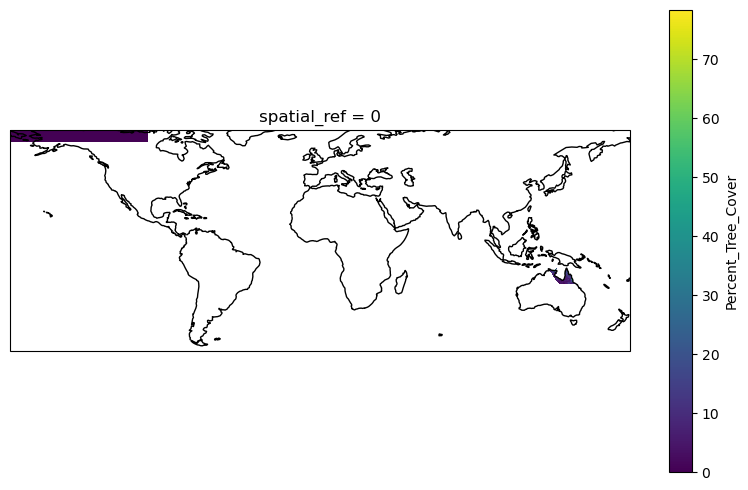

In [98]:
# https://corteva.github.io/rioxarray/html/examples/merge.html
# Create a plot
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())  # Set the projection to Plate Carree (longitude/latitude)
ax.coastlines()  # Add coastlines

# Assume the data variable to plot is named 'temperature'; adjust as per your dataset specifics
ds_new.Percent_Tree_Cover.plot(
    ax=ax, 
    transform=ccrs.PlateCarree(),  # Specifies the data's projection
    x='x', y='y',  # Adjust according to your data dimensions
    cmap='viridis'  # Color map
)
# ds_resampled['Percent_Tree_Cover'].sel(band=1).plot(
#     ax=ax, 
#     transform=ccrs.PlateCarree(),  # Specifies the data's projection
#     x='x', y='y',  # Adjust according to your data dimensions
#     cmap='viridis'  # Color map
# )

# ax.set_title('Temperature Data Visualization')
plt.show()

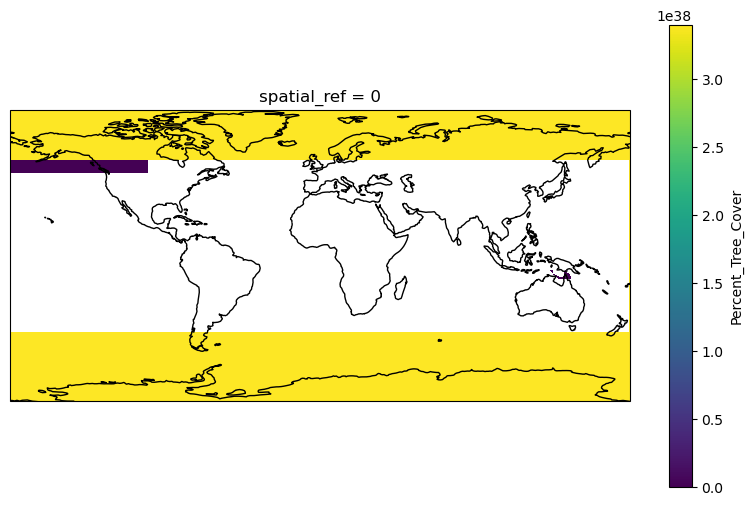

In [100]:
# https://corteva.github.io/rioxarray/html/examples/merge.html
# Create a plot
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())  # Set the projection to Plate Carree (longitude/latitude)
ax.coastlines()  # Add coastlines

# Assume the data variable to plot is named 'temperature'; adjust as per your dataset specifics
ds_resampled.Percent_Tree_Cover.plot(
    ax=ax, 
    transform=ccrs.PlateCarree(),  # Specifies the data's projection
    x='x', y='y',  # Adjust according to your data dimensions
    cmap='viridis'  # Color map
)
# ds_resampled['Percent_Tree_Cover'].sel(band=1).plot(
#     ax=ax, 
#     transform=ccrs.PlateCarree(),  # Specifies the data's projection
#     x='x', y='y',  # Adjust according to your data dimensions
#     cmap='viridis'  # Color map
# )

# ax.set_title('Temperature Data Visualization')
plt.show()

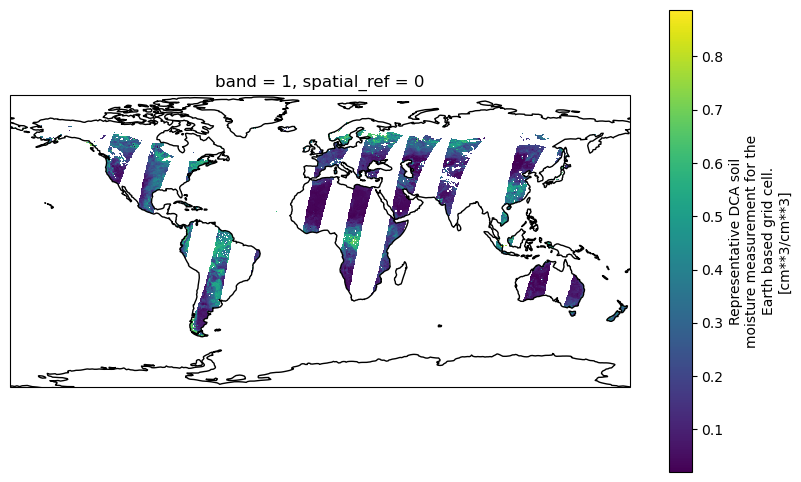

In [54]:
# https://corteva.github.io/rioxarray/html/examples/merge.html
# Create a plot
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())  # Set the projection to Plate Carree (longitude/latitude)
ax.coastlines()  # Add coastlines

# Assume the data variable to plot is named 'temperature'; adjust as per your dataset specifics
ease_template.plot(
    ax=ax, 
    transform=ccrs.PlateCarree(),  # Specifies the data's projection
    x='x', y='y',  # Adjust according to your data dimensions
    cmap='viridis'  # Color map
)
# ds_resampled['Percent_Tree_Cover'].sel(band=1).plot(
#     ax=ax, 
#     transform=ccrs.PlateCarree(),  # Specifies the data's projection
#     x='x', y='y',  # Adjust according to your data dimensions
#     cmap='viridis'  # Color map
# )

# ax.set_title('Temperature Data Visualization')
plt.show()